# Supervised Learning in Machine Learning - Classification and Regression  

In this notebook you will get familiar with some classification and regression algorithms using PyCaret python package with preprocessed "Pima Indians Diabetes Database" dataset.

**classification:**
This is a binary classification problem in which the aim is to predict which patients have diabetes based on a number of measurements.




**Please create a report by addressing the provided questions(Q1-Q5) throughout the notebook.**




In [2]:
!pip install joblib==1.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.9/301.9 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.0
    Uninstalling joblib-1.4.0:
      Successfully uninstalled joblib-1.4.0


In [ ]:
!pip install pycaret # install pycaret this way if you are running this notebook in google colab environment.

In [9]:
from pycaret.classification import *
from pycaret.utils.generic import check_metric

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

In [12]:
# load the preprocessed data

url = "https://raw.githubusercontent.com/thilinib/CBM101/main/E_Macine_Learning/data/preprocessed_diabetes.csv"
df = pd.read_csv(url)

In [13]:
# check the shape of the preprocessed data
df.shape

(394, 9)

In [14]:
# check how preprocessed data looks like
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89.0,66,23,94,28.1,0.167,21,0
1,0,137.0,40,35,168,43.1,2.288,33,1
2,3,78.0,50,32,88,31.0,0.248,26,1
3,2,197.0,70,45,543,30.5,0.158,53,1
4,1,189.0,60,23,846,30.1,0.398,59,1


In [15]:
# Calculating the relative size of each class
N_TRUE = len(df[df['Outcome'] == 1])
N_FALSE = len(df) - N_TRUE

print('N_TRUE = {}'.format(N_TRUE))
print('N_FALSE = {}'.format(N_FALSE))
print('N_FALSE fraction = {:.3f}'.format(N_FALSE/(N_FALSE+N_TRUE)))

N_TRUE = 130
N_FALSE = 264
N_FALSE fraction = 0.670


67% of the examples do not have diabetes, which will be our baseline for accuracy score of the classifiers.

#Splitting data into a Training set and a Test set
Pycaret will do the splitting automatically.If you use scikit-learn instead you need to do this by yourself e.g. using scikit-learn's `train_test_split()` -function.

# Setting up Environment in PyCaret

# Classification in Pycaret

`setup()` is Pycaret's main function and it needs to be run before executing any other function in pycaret. The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.

We'll set normalize and transformation *True* for automatic preprocessing.

In [16]:
# `session_id` parameter is equivalent to ‘random_state’ in scikit-learn. Let's use 42 for reproducibility.
s = setup(df, target='Outcome', normalize = True, transformation=True, session_id=42)

,Description,Value
0,Session id,42
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(394, 9)"
4,Transformed data shape,"(394, 9)"
5,Transformed train set shape,"(275, 9)"
6,Transformed test set shape,"(119, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

**session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 42 for later reproducibility.

**Transformed train and test set shapes**: Here you can see that pycaret has performed train-test-split automatically.

**Transformation method** : transformation method by default is set to ‘yeo-johnson’. The other available option for transformation is ‘quantile’. Can be changed using *transformation_method* parameter.

**Normalize method** : By default, normalize method is set to ‘zscore’. The other available option for normalizing is 'minmax'. Can be changed using *normalize_method* parameter.

# Create a model

In [17]:
# list all ML models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


Pycaret runs all different ML algorhitms using default parameters. We can compare all models using `compare_models()` which puts all models in order from best to worst.

This gives us lots of metrics we can use to evaluate the results:


**Accuracy** = $ \frac{Correctly\:predicted}{Total\:samples}$  <br>


**Precision** = $ \frac{True\:positive}{Total\:predicted\:positive}$ <br>


**Recall** = $ \frac{True\:positive}{Total\:actually\:positive}$ <br>


**F1** = $ 2* \frac{Precision*Recall}{Precision+Recall}$ <br>



In [18]:
# best model is saved in best_model object
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7930,0.6091,0.5933,0.7628,0.6514,0.5089,0.5266,0.2850
xgboost,Extreme Gradient Boosting,0.7892,0.5875,0.6144,0.7228,0.6511,0.5034,0.5158,0.1010
lda,Linear Discriminant Analysis,0.7784,0.7149,0.6178,0.6867,0.6420,0.4844,0.4908,0.0670
lightgbm,Light Gradient Boosting Machine,0.7751,0.5817,0.6044,0.7131,0.6412,0.4797,0.4930,0.3060
et,Extra Trees Classifier,0.7710,0.5354,0.5967,0.6727,0.6204,0.4623,0.4693,0.2000
rf,Random Forest Classifier,0.7675,0.5399,0.5833,0.6845,0.6214,0.4565,0.4645,0.2290
lr,Logistic Regression,0.7673,0.7209,0.5744,0.6672,0.6061,0.4471,0.4553,0.6610
ridge,Ridge Classifier,0.7673,0.0000,0.5744,0.6704,0.6085,0.4487,0.4564,0.0630
ada,Ada Boost Classifier,0.7642,0.5821,0.6178,0.6676,0.6355,0.4626,0.4680,0.1500
nb,Naive Bayes,0.7593,0.5000,0.6900,0.6304,0.6477,0.4669,0.4781,0.0680


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

The score grid printed above highlights the highest performing metric for comparison purposes only. The grid by default is sorted using 'Accuracy' (highest to lowest) which can be changed by passing the sort parameter. For example compare_models(sort = 'Recall') will sort the grid by Recall instead of Accuracy. If you want to change the fold parameter from the default value of 10 to a different value then you can use the fold parameter. For example compare_models(fold = 5) will compare all models on 5 fold cross validation. Reducing the number of folds will improve the training time.

Let's make few models using 10 fold stratified **cross validation**. You can change number of folds using `fold` parameter

# Create a Model

For the remaining part of this tutorial, we will work with the below models as our candidate models.

In [22]:
create_svm = create_model('svm', round=3)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.679,0.000,0.800,0.533,0.640,0.370,0.395
1,0.786,0.000,0.778,0.636,0.700,0.536,0.542
2,0.929,0.000,1.000,0.818,0.900,0.845,0.856
3,0.750,0.000,0.667,0.600,0.632,0.443,0.445
4,0.643,0.000,0.667,0.462,0.545,0.267,0.279
5,0.852,0.000,0.556,1.000,0.714,0.625,0.674
6,0.667,0.000,0.778,0.500,0.609,0.341,0.367
7,0.593,0.000,0.667,0.429,0.522,0.195,0.210
8,0.815,0.000,0.667,0.750,0.706,0.571,0.574


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

trained model object is stored in the variable 'create_svm'.


In [25]:
print(create_svm)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [23]:
create_lr= create_model('lr', round=3)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.607,0.750,0.300,0.429,0.353,0.083,0.086
1,0.714,0.772,0.556,0.556,0.556,0.345,0.345
2,0.893,0.816,0.889,0.800,0.842,0.761,0.764
3,0.714,0.632,0.444,0.571,0.500,0.304,0.309
4,0.893,0.749,0.889,0.800,0.842,0.761,0.764
5,0.815,0.846,0.667,0.750,0.706,0.571,0.574
6,0.778,0.586,0.667,0.667,0.667,0.500,0.500
7,0.704,0.728,0.333,0.600,0.429,0.250,0.270
8,0.815,0.728,0.667,0.750,0.706,0.571,0.574


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [24]:
create_gbc = create_model('gbc', round=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.714,0.750,0.600,0.600,0.600,0.378,0.378
1,0.821,0.556,0.667,0.750,0.706,0.578,0.580
2,0.857,0.757,0.778,0.778,0.778,0.673,0.673
3,0.679,0.611,0.444,0.500,0.471,0.241,0.242
4,0.821,0.602,0.556,0.833,0.667,0.551,0.572
5,0.815,0.451,0.667,0.750,0.706,0.571,0.574
6,0.815,0.701,0.667,0.750,0.706,0.571,0.574
7,0.852,0.531,0.556,1.000,0.714,0.625,0.674
8,0.778,0.648,0.667,0.667,0.667,0.500,0.500


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Notice that the mean score of all models matches with the score printed in compare_models(). This is because the metrics printed in the compare_models() score grid are the average scores across all CV folds. Similar to compare_models(), if you want to change the fold parameter from the default value of 10 to a different value then you can use the fold parameter. For Example: create_model('dt', fold = 5) will create a Decision Tree Classifier using 5 fold stratified CV.

#Tune a Model

When a model is created using the `create_model()` function it uses the default hyperparameters to train the model. In order to tune hyperparameters, the `tune_model()` function is used. The `tune_model()` function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. For example: tune_model('svm', optimize = 'AUC') will search for the hyperparameters of a svm Classifier that results in highest AUC. For the purposes of this example, we have used the default metric Accuracy for the sake of simplicity only.

The number of iterations is defined by n_iter. By default, it is set to 10. You can change it with `n_iter` parameter

In [28]:
tuned_svm = tune_model(create_svm, round=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.643,0.000,0.400,0.500,0.444,0.186,0.189
1,0.714,0.000,0.556,0.556,0.556,0.345,0.345
2,0.821,0.000,0.667,0.750,0.706,0.578,0.580
3,0.786,0.000,0.556,0.714,0.625,0.478,0.486
4,0.857,0.000,0.778,0.778,0.778,0.673,0.673
5,0.815,0.000,0.667,0.750,0.706,0.571,0.574
6,0.815,0.000,0.667,0.750,0.706,0.571,0.574
7,0.741,0.000,0.556,0.625,0.588,0.400,0.401
8,0.815,0.000,0.667,0.750,0.706,0.571,0.574


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [31]:
#tuned model object is stored in the variable 'tuned_dt'.
print(tuned_svm)

SGDClassifier(alpha=0.02, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.3, fit_intercept=True,
              l1_ratio=0.3800000001, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l1',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [29]:
tuned_lr = tune_model(create_lr, round=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.714,0.731,0.700,0.583,0.636,0.404,0.409
1,0.821,0.772,0.889,0.667,0.762,0.624,0.640
2,0.893,0.816,0.889,0.800,0.842,0.761,0.764
3,0.643,0.632,0.556,0.455,0.500,0.227,0.229
4,0.893,0.711,0.889,0.800,0.842,0.761,0.764
5,0.815,0.846,0.778,0.700,0.737,0.595,0.597
6,0.741,0.599,0.778,0.583,0.667,0.462,0.474
7,0.778,0.741,0.778,0.636,0.700,0.526,0.533
8,0.778,0.728,0.778,0.636,0.700,0.526,0.533


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [30]:
tuned_gbc = tune_model(create_gbc, round=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.679,0.533,0.600,0.545,0.571,0.315,0.316
1,0.893,0.371,0.778,0.875,0.824,0.747,0.750
2,0.821,0.807,0.778,0.700,0.737,0.602,0.604
3,0.714,0.564,0.556,0.556,0.556,0.345,0.345
4,0.821,0.699,0.556,0.833,0.667,0.551,0.572
5,0.778,0.386,0.556,0.714,0.625,0.471,0.478
6,0.815,0.731,0.778,0.700,0.737,0.595,0.597
7,0.852,0.503,0.556,1.000,0.714,0.625,0.674
8,0.778,0.438,0.667,0.667,0.667,0.500,0.500


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Notice how accuracy after tuning have changed like,

**SVM:** from `0.749` to `0.778` </br>
**LR:** from `0.767` to `0.785`  </br>



#Plot a Model
Before model finalization, the plot_model() function can be used to analyze the performance across different aspects such as AUC, confusion_matrix, decision boundary etc. This function takes a trained model object and returns a plot based on the test / hold-out set.

There are 15 different plots available.

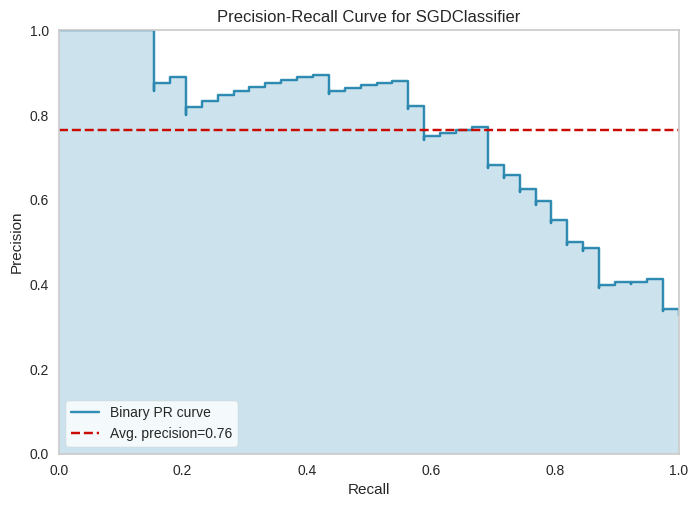

In [35]:
#AUC Plot
plot_model(tuned_svm, plot = 'pr')


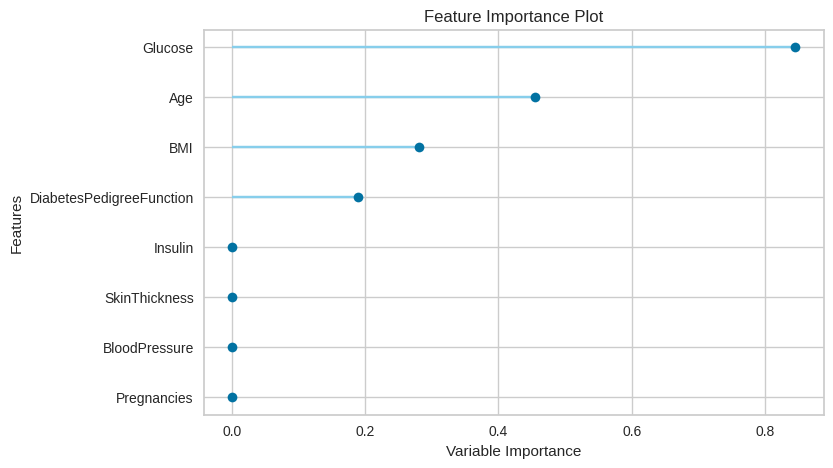

In [36]:
plot_model(tuned_svm, plot='feature')



> **Q1 :** What does feature importance mean? What are the most important features according to the feature plot? Plot the three most important variables with seaborn pairplot using 'Disease' as hue and see if you can notice any correlation.





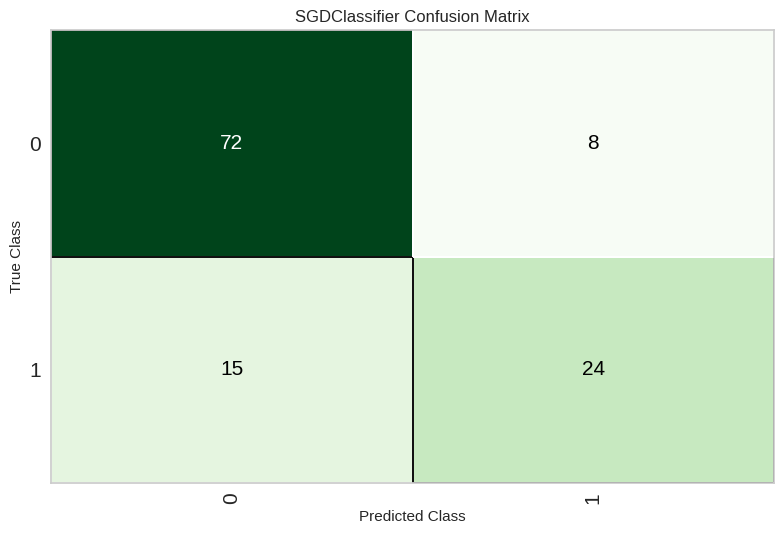

In [37]:
plot_model(tuned_svm, plot = 'confusion_matrix')


plot_model(tuned_svm, plot = 'auc') This will return an error since SVM models, do not provide probability estimates directly. But AUC plot requires probability estimates to calculate the AUC score.

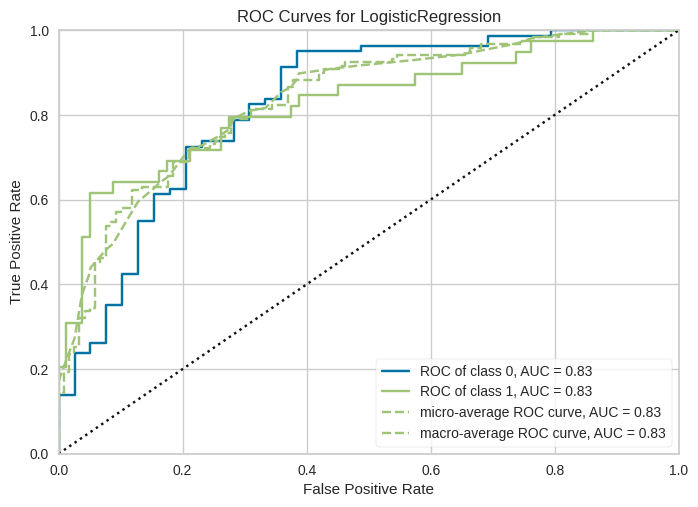

In [39]:
plot_model(tuned_lr, plot = 'auc')

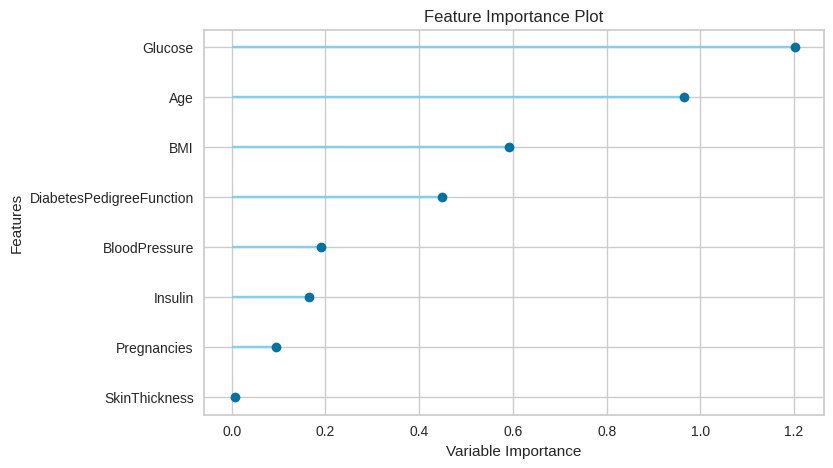

In [40]:
plot_model(tuned_lr, plot='feature')

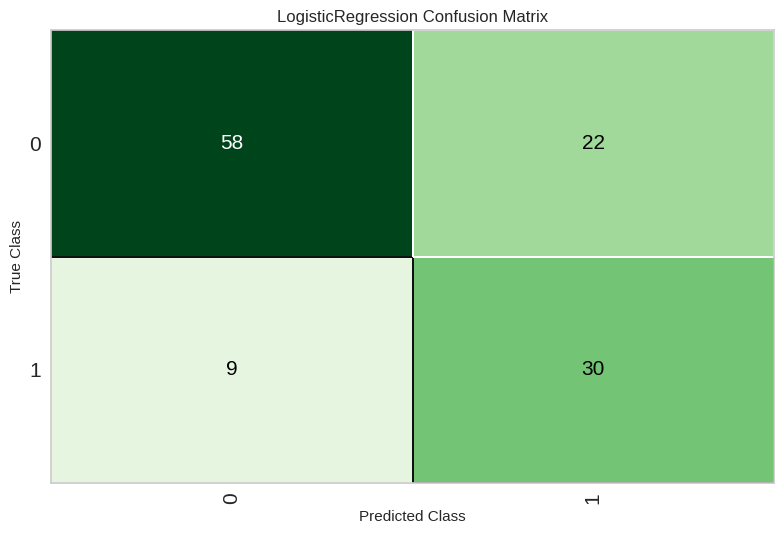

In [41]:
plot_model(tuned_lr, plot = 'confusion_matrix')


Another way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [44]:
evaluate_model(tuned_gbc)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#Predict on test / hold-out Sample

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. If you look at the information grid after running `setup()`, you will see that 30% (119 samples) of the data has been separated out as test/hold-out sample. All of the evaluation metrics we have seen above are cross validated results based on the training set (70%) only. Now, using our final trained model stored in the tuned models (most accurate model) variable we will predict against the hold-out sample and evaluate the metrics to see if they are materially different than the cross validated results.

When data is None (default), it uses the test set (created during the setup function) for scoring.

In [45]:
predict_model(tuned_svm);


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8067,0.7577,0.6154,0.7500,0.6761,0.5402,0.5456


The accuracy of test set is `0.806` compared to `0.778` achieved with the train set. Dataset is quite small so in that context this is not significant difference but if there is a large variation between the test and train results, it might indicate over-fitting (if train-score is higher than test) but could also be due to several other factors and would require further investigation. In this case, accuracy of test set is higher than training so will move forward with finalizing the model.




# Finalize model

Model finalization is the last step in the experiment. The purpose of this function is to train the model on the complete dataset including test data, before it is deployed in production.

This function doesn't change any parameter of the model. It only refits on the entire dataset including the hold-out set.

In [48]:
final_svm = finalize_model(tuned_svm)
final_svm

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Pregnancies', 'Glucose',
                                             'BloodPressure', 'SkinThickness',
                                             'Insulin', 'BMI',
                                             'DiabetesPedigreeFunction',
                                             'Age'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                (...
                 SGDClassifier(alpha=0.02, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.3,
                               fit_intercept=True, l1_ratio=0.3800000001,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=-1,
                               penalty='l1', power_t=0.5, random_state=42,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

# Predict on unseen data

Now we have a fully trained model we could start using new data. Because we used all our data for training and have no new data to test the model we can only demonstrate using the same data.

In [50]:
predictions = predict_model(final_svm, data=df) # pass the model and unseen-data as parameters
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7944,0.7392,0.5769,0.7426,0.6494,0.5072,0.5152


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prediction_label
0,1,89.0,66,23,94,28.100000,0.167,21,0,0
1,0,137.0,40,35,168,43.099998,2.288,33,1,1
2,3,78.0,50,32,88,31.000000,0.248,26,1,0
3,2,197.0,70,45,543,30.500000,0.158,53,1,1
4,1,189.0,60,23,846,30.100000,0.398,59,1,1


The *Label* and *Score* columns can add onto the dataframe. Label is the prediction and score is the probability of the prediction. Notice that predicted results are concatenated to the original dataset while all the transformations are automatically performed in the background. You can also check the metrics using `pycaret.utils module`. You can do this easily with basic python too, but this is a simple way if you want to check any metrics (such as recall) as well. See example below:

In [53]:

# compare target and predicted labels
print("Prediction accuracy", check_metric(df['Outcome'], predictions['prediction_label'], metric = 'Accuracy'))
print("Prediction recall",check_metric(df['Outcome'], predictions['prediction_label'], metric = 'Recall'))

Prediction accuracy 0.7944
Prediction recall 0.5769


# Saving the model

We have now finished the experiment by finalizing the tuned_svm model which is now stored in final_svm variable. We have also used the model stored in final_svm to predict data_unseen. This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, PyCaret's inbuilt function save_model() allows you to save the model along with entire transformation pipeline for later use.

In [58]:
save_model(final_svm,'Final svm Model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pregnancies', 'Glucose',
                                              'BloodPressure', 'SkinThickness',
                                              'Insulin', 'BMI',
                                              'DiabetesPedigreeFunction',
                                              'Age'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 (...
          

# load saved data

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's load_model() function and then easily apply the saved model on new unseen data for prediction.

In [61]:
saved_final_svm = load_model('Final svm Model')


Transformation Pipeline and Model Successfully Loaded


Once the model is loaded in the environment, you can simply use it to predict on any new data using the same predict_model() function. Below we have applied the loaded model to predict the same dataset.

In [62]:
new_prediction = predict_model(saved_final_svm, data=df)
new_prediction


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7944,0.7392,0.5769,0.7426,0.6494,0.5072,0.5152


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prediction_label
0,1,89.0,66,23,94,28.100000,0.167,21,0,0
1,0,137.0,40,35,168,43.099998,2.288,33,1,1
2,3,78.0,50,32,88,31.000000,0.248,26,1,0
3,2,197.0,70,45,543,30.500000,0.158,53,1,1
4,1,189.0,60,23,846,30.100000,0.398,59,1,1
...,...,...,...,...,...,...,...,...,...,...
389,0,181.0,88,44,510,43.299999,0.222,26,1,1
390,1,128.0,88,39,110,36.500000,1.057,37,1,1
391,2,88.0,58,26,16,28.400000,0.766,22,0,0
392,10,101.0,76,48,180,32.900002,0.171,63,0,0
